In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
#los kmeasn tiene que ser de manera aleatorea
#numero de grupos igual de manera aleatorea
import numpy as np

n_centers = np.random.randint(1,21)

X, y = make_blobs(n_samples=20000, centers=n_centers, n_features=2, cluster_std=1.0, random_state=42)

k = np.random.randint(2, 11)
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_pred = kmeans.fit_predict(X)

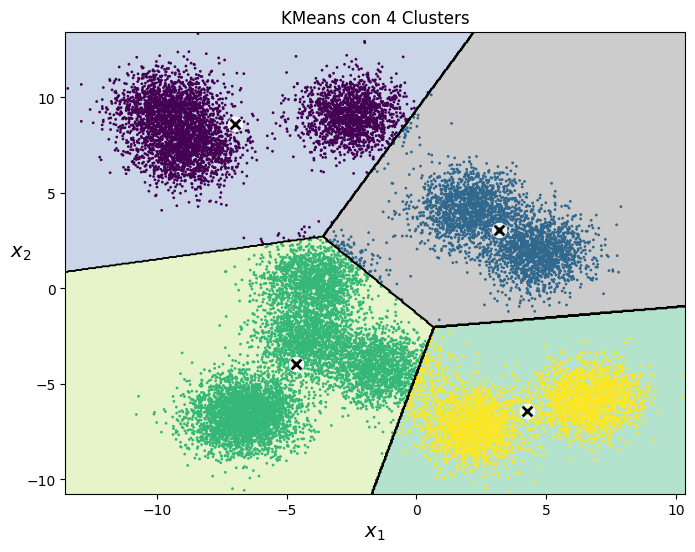

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_data(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=500):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    clusterer_2d = KMeans(n_clusters=k, random_state=42)
    clusterer_2d.fit(X[:, :2])
    Z = clusterer_2d.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap="Pastel2")
    plt.contour(xx, yy, Z, linewidths=1, colors='k')
    plot_data(X[:, :2], y_pred)
    plot_centroids(clusterer_2d.cluster_centers_)


# Generar la gráfica con las fronteras de decisión
plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
plt.title(f"KMeans con {k} Clusters")
plt.show()



In [10]:
kmeans.transform(X)

array([[ 7.22143088,  4.50772025, 10.86130111, 13.19024197],
       [15.41270642, 13.94979219,  3.48627953, 10.93250759],
       [11.30968546,  1.95393551,  8.59050993,  8.36198929],
       ...,
       [17.59071443, 10.41169879,  6.4108112 ,  3.38434769],
       [10.50011097,  1.37570449, 10.99817605, 10.85848819],
       [ 1.0251127 , 11.28240851, 11.82236766, 18.06789816]],
      shape=(20000, 4))

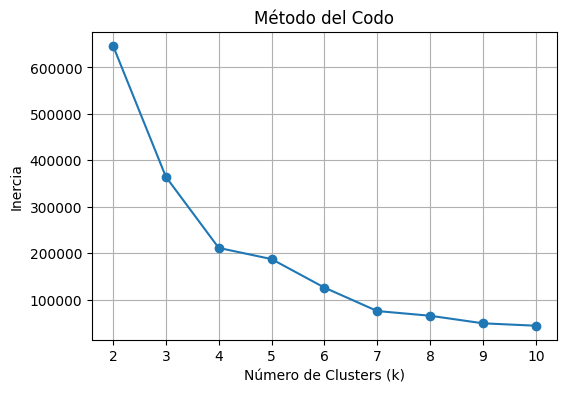

In [11]:
def plot_elbow_method(X):
    inertia = []
    k_values = range(2, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(6, 4))
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Inercia")
    plt.title("Método del Codo")
    plt.grid(True)
    plt.show()
    # Aplicar el método del codo para determinar el valor óptimo de k
plot_elbow_method(X)

In [12]:

sil_score = silhouette_score(X, y_pred)
print(f"Silhouette Score: {sil_score:.4f}")
silhouette_score(X, kmeans.labels_)


Silhouette Score: 0.5670


np.float64(0.5669923407000914)

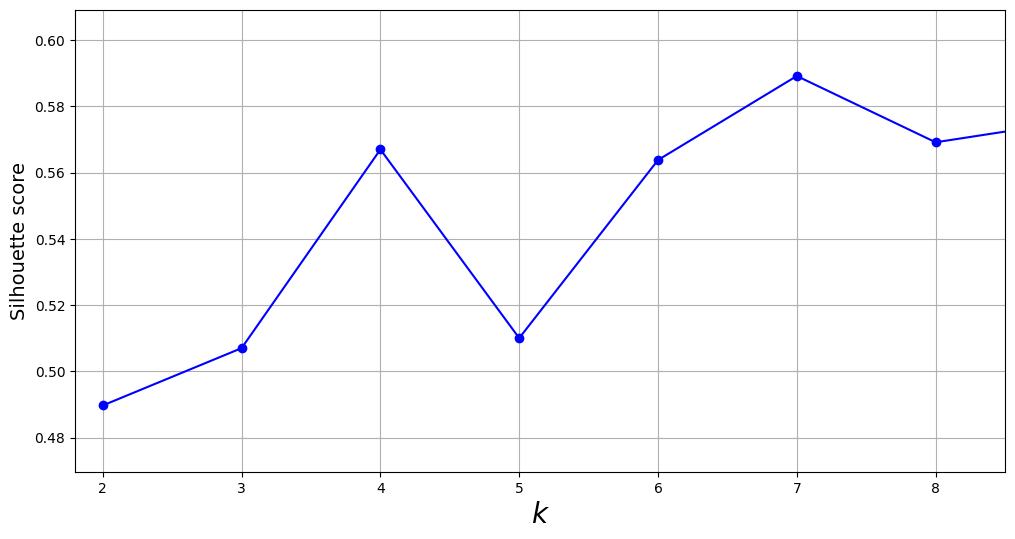

In [13]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(12, 6))  # Aumentamos el tamaño del gráfico
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=20)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, min(silhouette_scores) - 0.02, max(silhouette_scores) + 0.02])  # Ajusta ejes para ver todo
plt.grid(True)
plt.show()


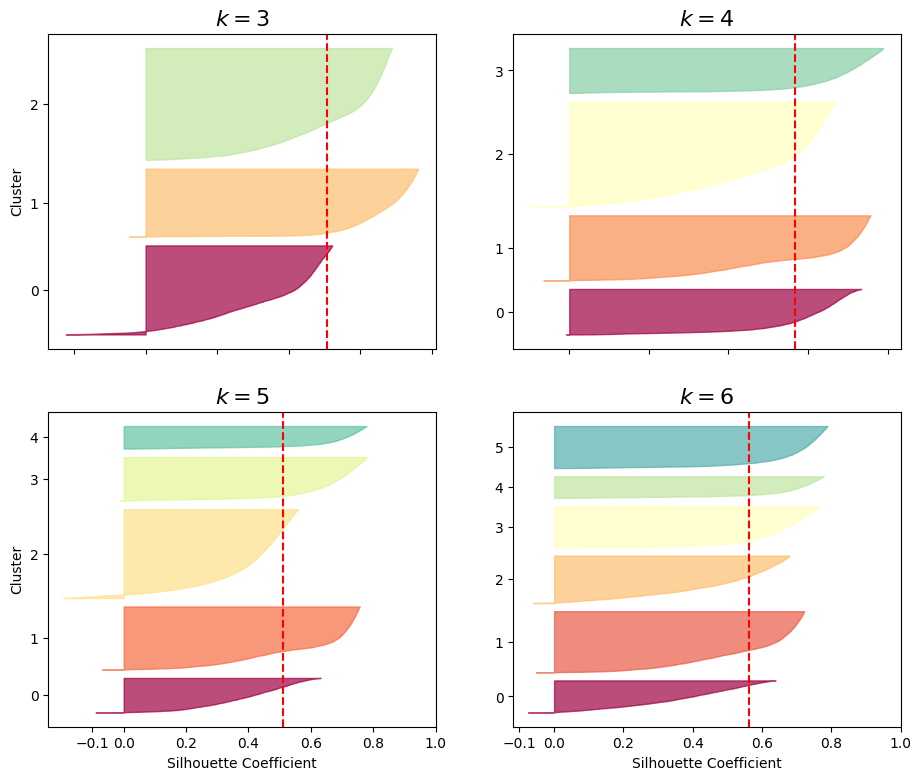

In [14]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()